In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# ## 1. Veri Setini Yükleme

# %% [code]
# Veri setini yükle
df_processed = pd.read_csv('../data/processed_imdb_dataset.csv')
print(f"✅ İşlenmiş veri seti yüklendi: {df_processed.shape}")

# Eksik değer kontrolü
print(f"Eksik değerler: {df_processed['tokens_lemmatized'].isna().sum()}")
df_processed = df_processed.dropna(subset=['tokens_lemmatized'])

# Lemmatize edilmiş token'ları string formatına çevir
df_processed['tokens_lemmatized_str'] = df_processed['tokens_lemmatized'].apply(lambda x: ' '.join(eval(x)))


✅ İşlenmiş veri seti yüklendi: (50000, 6)
Eksik değerler: 0


In [9]:
# ## 2. Bag of Words (BoW) Vektörizasyonu - TÜM KELİMELER

# %% [code]
# BoW vektörleştiriciyi başlat (max_features kaldırıldı - TÜM kelimeler dahil)
bow_vectorizer = CountVectorizer(min_df=5, max_df=0.9)

# BoW vektörlerini oluştur
X_bow = bow_vectorizer.fit_transform(df_processed['tokens_lemmatized_str'])

# Özellik isimlerini al
bow_features = bow_vectorizer.get_feature_names_out()
print(f"✅ BoW vektörleri oluşturuldu: {X_bow.shape}")
print(f"Toplam özellik sayısı (kelime sayısı): {len(bow_features)}")
print(f"Örnek özellik isimleri: {bow_features[:10]}...")


✅ BoW vektörleri oluşturuldu: (50000, 29165)
Toplam özellik sayısı (kelime sayısı): 29165
Örnek özellik isimleri: ['aa' 'aaa' 'aaargh' 'aag' 'aaliyah' 'aames' 'aamir' 'aankhen' 'aapke'
 'aardman']...


In [10]:
# ## 3. TF-IDF Vektörizasyonu - TÜM KELİMELER

# %% [code]
# TF-IDF vektörleştiriciyi başlat (max_features kaldırıldı - TÜM kelimeler dahil)
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9)

# TF-IDF vektörlerini oluştur
X_tfidf = tfidf_vectorizer.fit_transform(df_processed['tokens_lemmatized_str'])

# Özellik isimlerini al
tfidf_features = tfidf_vectorizer.get_feature_names_out()
print(f"✅ TF-IDF vektörleri oluşturuldu: {X_tfidf.shape}")
print(f"Toplam özellik sayısı (kelime sayısı): {len(tfidf_features)}")
print(f"Örnek özellik isimleri: {tfidf_features[:10]}...")


✅ TF-IDF vektörleri oluşturuldu: (50000, 29165)
Toplam özellik sayısı (kelime sayısı): 29165
Örnek özellik isimleri: ['aa' 'aaa' 'aaargh' 'aag' 'aaliyah' 'aames' 'aamir' 'aankhen' 'aapke'
 'aardman']...


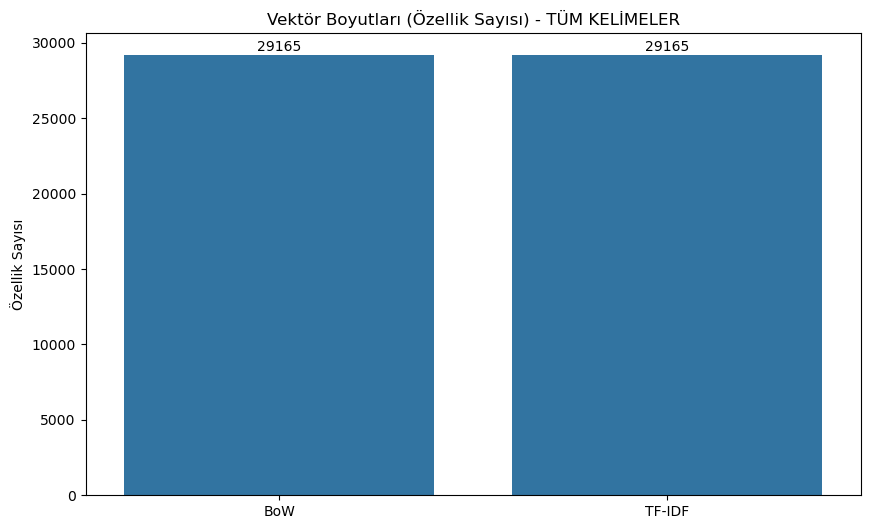

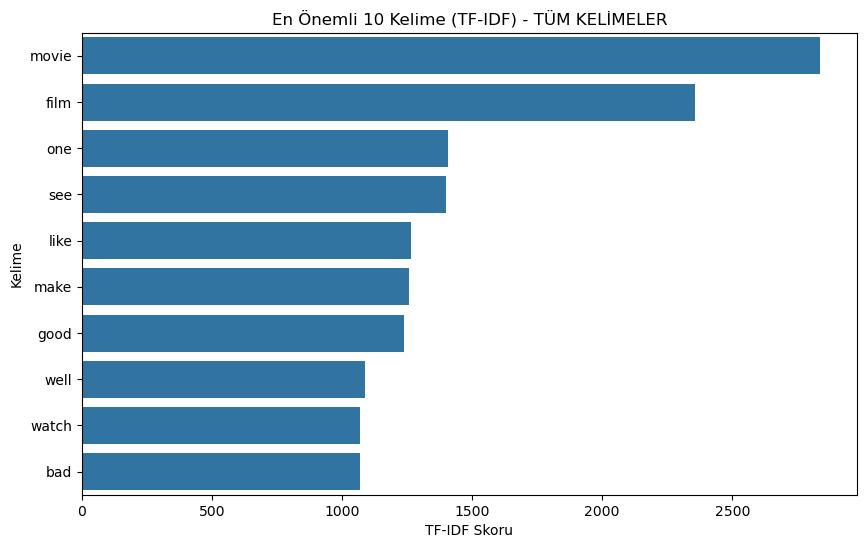


📊 Vektör Boyutları:
BoW: 50000 doküman x 29165 özellik
TF-IDF: 50000 doküman x 29165 özellik
Toplam benzersiz kelime sayısı: 29165


In [11]:
# BoW ve TF-IDF vektörlerinin boyutlarını görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=['BoW', 'TF-IDF'], y=[X_bow.shape[1], X_tfidf.shape[1]])
plt.title('Vektör Boyutları (Özellik Sayısı) - TÜM KELİMELER')
plt.ylabel('Özellik Sayısı')
for i, v in enumerate([X_bow.shape[1], X_tfidf.shape[1]]):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')
plt.show()

# En sık kullanılan kelimeleri görselleştir (TF-IDF için)
tfidf_sum = np.sum(X_tfidf.toarray(), axis=0)
top_indices = np.argsort(tfidf_sum)[::-1][:10]
top_features = [tfidf_features[i] for i in top_indices]
top_scores = tfidf_sum[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title('En Önemli 10 Kelime (TF-IDF) - TÜM KELİMELER')
plt.xlabel('TF-IDF Skoru')
plt.ylabel('Kelime')
plt.show()

# Vektör boyutları hakkında bilgi
print(f"\n📊 Vektör Boyutları:")
print(f"BoW: {X_bow.shape[0]} doküman x {X_bow.shape[1]} özellik")
print(f"TF-IDF: {X_tfidf.shape[0]} doküman x {X_tfidf.shape[1]} özellik")
print(f"Toplam benzersiz kelime sayısı: {len(bow_features)}")


In [13]:
# %% [markdown]
# ## 5. Vektörleştirilmiş Veriyi Kaydetme (Sparse Format - Bellek Verimli)

# %% [code]
import pickle
import os
import scipy.sparse as sp

# Kaydetme için hedef dizini kontrol et
os.makedirs('../data', exist_ok=True)

print("🔄 Vektörler sparse format olarak kaydediliyor...")

# BoW vektörlerini sparse olarak kaydet
try:
    sp.save_npz('../data/X_bow_full_sparse.npz', X_bow)
    file_size = os.path.getsize('../data/X_bow_full_sparse.npz') / (1024*1024)  # MB
    print(f"✅ BoW vektörleri '../data/X_bow_full_sparse.npz' dosyasına kaydedildi.")
    print(f"📁 BoW dosya boyutu: {file_size:.2f} MB")
except Exception as e:
    print(f"❌ BoW vektörlerini kaydederken hata oluştu: {e}")

# TF-IDF vektörlerini sparse olarak kaydet
try:
    sp.save_npz('../data/X_tfidf_full_sparse.npz', X_tfidf)
    file_size = os.path.getsize('../data/X_tfidf_full_sparse.npz') / (1024*1024)  # MB
    print(f"✅ TF-IDF vektörleri '../data/X_tfidf_full_sparse.npz' dosyasına kaydedildi.")
    print(f"📁 TF-IDF dosya boyutu: {file_size:.2f} MB")
except Exception as e:
    print(f"❌ TF-IDF vektörlerini kaydederken hata oluştu: {e}")

# BoW vektörleştiriciyi kaydet
try:
    with open('../data/bow_vectorizer_full.pkl', 'wb') as f:
        pickle.dump(bow_vectorizer, f)
    print("✅ BoW vektörleştirici '../data/bow_vectorizer_full.pkl' dosyasına kaydedildi.")
except Exception as e:
    print(f"❌ BoW vektörleştiriciyi kaydederken hata oluştu: {e}")

# TF-IDF vektörleştiriciyi kaydet
try:
    with open('../data/tfidf_vectorizer_full.pkl', 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    print("✅ TF-IDF vektörleştirici '../data/tfidf_vectorizer_full.pkl' dosyasına kaydedildi.")
except Exception as e:
    print(f"❌ TF-IDF vektörleştiriciyi kaydederken hata oluştu: {e}")

# Etiketleri kaydet
try:
    df_processed['sentiment'].to_csv('../data/labels.csv', index=False)
    print("✅ Etiketler '../data/labels.csv' dosyasına kaydedildi.")
except Exception as e:
    print(f"❌ Etiketleri kaydederken hata oluştu: {e}")

# Sparse matris bilgilerini göster
print(f"\n📊 Sparse Matris Bilgileri:")
print(f"BoW Sparse Ratio: {(1 - X_bow.nnz / (X_bow.shape[0] * X_bow.shape[1])) * 100:.2f}% sıfır değer")
print(f"TF-IDF Sparse Ratio: {(1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])) * 100:.2f}% sıfır değer")

print("\n✅ Tüm vektörleştirilmiş veriler ve vektörleştiriciler başarıyla kaydedildi.")
print("📝 NOT: Vektörler sparse format (.npz) ile kaydedildi - bellek verimli!")

# Özet bilgi
print(f"\n📈 ÖZET:")
print(f"• Toplam doküman sayısı: {X_bow.shape[0]}")
print(f"• Toplam benzersiz kelime sayısı: {X_bow.shape[1]}")
print(f"• min_df=5: En az 5 dokümanda geçen kelimeler")
print(f"• max_df=0.9: En fazla %90 dokümanda geçen kelimeler")
print(f"• max_features: KALDIRILDı - TÜM kelimeler dahil")
print(f"• Format: Sparse (.npz) - Bellek verimli kaydetme")

# Sparse matrisleri yükleme talimatları
print(f"\n📖 Kaydedilen dosyaları yükleme:")
print("```python")
print("import scipy.sparse as sp")
print("import pickle")
print("")
print("# Sparse vektörleri yükle")
print("X_bow = sp.load_npz('../data/X_bow_full_sparse.npz')")
print("X_tfidf = sp.load_npz('../data/X_tfidf_full_sparse.npz')")
print("")
print("# Vektörleştiricileri yükle")
print("with open('../data/bow_vectorizer_full.pkl', 'rb') as f:")
print("    bow_vectorizer = pickle.load(f)")
print("with open('../data/tfidf_vectorizer_full.pkl', 'rb') as f:")
print("    tfidf_vectorizer = pickle.load(f)")
print("")
print("# Etiketleri yükle")
print("labels = pd.read_csv('../data/labels.csv')")
print("```")

print("\n🎯 Artık machine learning modelleri için hazırsın!")
print("   Sklearn modelleri sparse matrislerle direkt çalışabilir.")

🔄 Vektörler sparse format olarak kaydediliyor...
✅ BoW vektörleri '../data/X_bow_full_sparse.npz' dosyasına kaydedildi.
📁 BoW dosya boyutu: 9.66 MB
✅ TF-IDF vektörleri '../data/X_tfidf_full_sparse.npz' dosyasına kaydedildi.
📁 TF-IDF dosya boyutu: 40.83 MB
✅ BoW vektörleştirici '../data/bow_vectorizer_full.pkl' dosyasına kaydedildi.
✅ TF-IDF vektörleştirici '../data/tfidf_vectorizer_full.pkl' dosyasına kaydedildi.
✅ Etiketler '../data/labels.csv' dosyasına kaydedildi.

📊 Sparse Matris Bilgileri:
BoW Sparse Ratio: 99.69% sıfır değer
TF-IDF Sparse Ratio: 99.69% sıfır değer

✅ Tüm vektörleştirilmiş veriler ve vektörleştiriciler başarıyla kaydedildi.
📝 NOT: Vektörler sparse format (.npz) ile kaydedildi - bellek verimli!

📈 ÖZET:
• Toplam doküman sayısı: 50000
• Toplam benzersiz kelime sayısı: 29165
• min_df=5: En az 5 dokümanda geçen kelimeler
• max_df=0.9: En fazla %90 dokümanda geçen kelimeler
• max_features: KALDIRILDı - TÜM kelimeler dahil
• Format: Sparse (.npz) - Bellek verimli kaydet